In [1]:
from deepBreaks.preprocessing import read_data
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd


In [2]:
wrk_dir = "./vpod_1.2_data_splits_2025-02-28_15-51-04"
MutMetaFileName = f"{wrk_dir}/mut_meta.tsv"
#aapTestFileName = "./optics_on_aa_prop_wt_mut_test_2025-03-24_20-23-29/mut_predictions.tsv"
#ohTestFileName = f"./optics_on_vpod_muts_oh_2024-12-09_13-22-49/vpod_mut_predictions.tsv"
aapTestFileName = "./optics_on_aa_prop_wt_mnm_mut_test_2025-04-21_21-01-08/mut_predictions.tsv"
ohTestFileName = f"./optics_on_one_hot_wt_mnm_mut_test_2025-03-24_16-22-03/mut_predictions.tsv"
mut_meta = read_data(MutMetaFileName, seq_type = None, is_main=False)
mut_meta = mut_meta.drop('Bovine')

aap_test = read_data(aapTestFileName, seq_type = None, is_main=False)
oh_test = read_data(ohTestFileName, seq_type = None, is_main=False)

In [3]:
mut_meta.head()

,Lambda_Max,Species,Opsin_Family,Phylum,Class,Accession,Mutations,Protein,RefId
Seq_Id,,,,,,,,,
M1,503.800000,Tachyglossus_aculeatus,Rh1,Chordata,Mammalia,JX103830_N83D,N83D,MNGTEGQDFYIPMSNKTGIVRSPFEYPQYYLAEPWQYSVLAAYMFM...,116.0
M2,498.000000,Tachyglossus_aculeatus,Rh1,Chordata,Mammalia,JX103830_T158A,T158A,MNGTEGQDFYIPMSNKTGIVRSPFEYPQYYLAEPWQYSVLAAYMFM...,116.0
M3,499.400000,Tachyglossus_aculeatus,Rh1,Chordata,Mammalia,JX103830_F169A,F169A,MNGTEGQDFYIPMSNKTGIVRSPFEYPQYYLAEPWQYSVLAAYMFM...,116.0
M4,501.500000,Bos_taurus,Rh1,Chordata,Mammalia,NM_001014890_D83G,D83G,MNGTEGPNFYVPFSNKTGVVRSPFEAPQYYLAEPWQFSMLAAYMFL...,117.0
M5,493.833333,Bos_taurus,Rh1,Chordata,Mammalia,NM_001014890_D83N,D83N,MNGTEGPNFYVPFSNKTGVVRSPFEAPQYYLAEPWQFSMLAAYMFL...,117.0


In [4]:
aap_test['Abs_Err'] = abs(mut_meta['Lambda_Max']-aap_test['Prediction_Medians'])
oh_test['Abs_Err'] = abs(mut_meta['Lambda_Max']-oh_test['Prediction_Medians'])

aap_test['Sqr_Err'] = aap_test['Abs_Err']**2
oh_test['Sqr_Err'] = oh_test['Abs_Err']**2

In [5]:
aap_test.head()

,Single_Prediction,Prediction_Means,Prediction_Medians,Prediction_Lower_Bounds,Prediction_Upper_Bounds,Std_Deviation,%Identity_Nearest_VPOD_Sequence,Sequence_Length,Lmax_Hex_Color,Abs_Err,Sqr_Err
Names,,,,,,,,,,,
M1,497.5,498.1,498.1,494.9,500.6,1.2,-,353,#00ffa8,5.700000,32.490000
M2,497.6,498.1,498.1,496.6,500.7,1.1,-,353,#00ffa8,0.100000,0.010000
M3,497.5,498.1,498.2,496.5,499.9,1.0,-,353,#00ffa8,1.200000,1.440000
M4,499.3,499.8,500.0,497.2,502.1,1.2,-,348,#00ff95,1.500000,2.250000
M5,499.3,499.8,499.9,497.4,501.9,1.1,-,348,#00ff95,6.066667,36.804444


In [6]:
oh_test.head()

,Single_Prediction,Prediction_Means,Prediction_Medians,Prediction_Lower_Bounds,Prediction_Upper_Bounds,Std_Deviation,%Identity_Nearest_VPOD_Sequence,Sequence_Length,Lmax_Hex_Color,Abs_Err,Sqr_Err
Names,,,,,,,,,,,
M1,498.8,498.7,498.8,495.8,500.2,1.0,-,353,#00ffa2,5.000000,25.000000
M2,497.7,497.5,497.8,494.6,498.6,1.0,-,353,#00ffaf,0.200000,0.040000
M3,497.7,497.7,497.8,495.3,499.2,0.9,-,353,#00ffad,1.600000,2.560000
M4,500.5,500.1,500.2,497.4,502.8,1.4,-,348,#00ff91,1.300000,1.690000
M5,498.8,498.6,498.8,496.1,500.8,1.2,-,348,#00ffa3,4.966667,24.667778


In [7]:
aaprop_r2 = r2_score(mut_meta['Lambda_Max'], aap_test['Prediction_Medians'])
aaprop_mae = mean_absolute_error(mut_meta['Lambda_Max'], aap_test['Prediction_Medians'])
print(f'AA-Prop R2 = {aaprop_r2} // Mean Absolute Error (MAE) = {aaprop_mae}')

AA-Prop R2 = 0.9339936729194546 // Mean Absolute Error (MAE) = 9.206690279417554


In [8]:
onehot_r2 = r2_score(mut_meta['Lambda_Max'], oh_test['Prediction_Medians'])
onehot_mae = mean_absolute_error(mut_meta['Lambda_Max'], oh_test['Prediction_Medians'])

print(f'One-Hot R2 = {onehot_r2} // Mean Absolute Error (MAE) = {onehot_mae}')

One-Hot R2 = 0.9242750170239052 // Mean Absolute Error (MAE) = 9.863124754033846


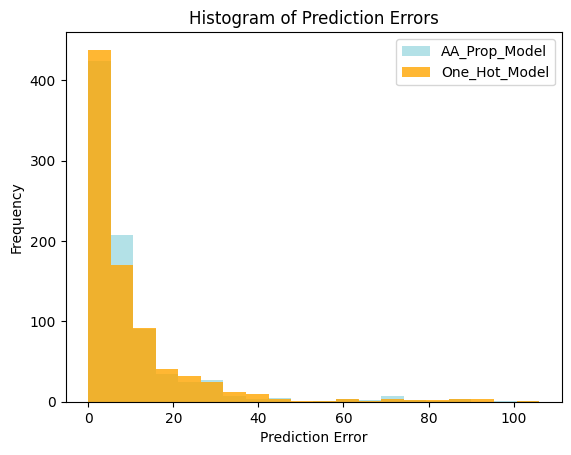

Shapiro-Wilk Test for AA-Prop Errors: statistic = 0.6000443110726495 p-value = 2.9347212052261406e-40
Shapiro-Wilk Test for One-Hot Errors: statistic = 0.627012776800995 p-value = 2.839933294088826e-39
Anderson Test for AA-Prop Errors: statistic = 93.08462715003895
Anderson Test for One-Hot Errors: statistic = 85.60243586899901
Critical Values are: [0.573 0.653 0.783 0.914 1.087]


In [9]:

import matplotlib.pyplot as plt
import scipy.stats as st

# Histogram
plt.hist(aap_test['Abs_Err'], bins=20, alpha=0.4, label='AA_Prop_Model', color='#41b6c4')
#plt.hist(abs(vert_test['Abs_Err']), bins=20, alpha=0.6, label='Vert_Model')
plt.hist(oh_test['Abs_Err'], bins=20, alpha=0.8, label='One_Hot_Model', color='orange')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Prediction Errors')
plt.show()

# Shapiro-Wilk Test for Normal Distribution
statistic, p_value = st.shapiro(abs(aap_test['Abs_Err']))
print("Shapiro-Wilk Test for AA-Prop Errors: statistic =", statistic, "p-value =", p_value)
#statistic, p_value = st.shapiro(abs(vert_test['Abs_Err']))
#print("Shapiro-Wilk Test for Vert-Model Errors: statistic =", statistic, "p-value =", p_value)
statistic, p_value = st.shapiro(abs(oh_test['Abs_Err']))
print("Shapiro-Wilk Test for One-Hot Errors: statistic =", statistic, "p-value =", p_value)

# Anderson Test for Normal Distribution
res = st.anderson(abs(aap_test['Abs_Err']))
print("Anderson Test for AA-Prop Errors: statistic =", res.statistic)
res = st.anderson(abs(oh_test['Abs_Err']))
print("Anderson Test for One-Hot Errors: statistic =", res.statistic)

print(f"Critical Values are: {res.critical_values}")

In [10]:
import scipy.stats as st
import statistics

# Perform Wilcoxn Signed-Rank Test on ALL Mutant Data
print("Wilcoxn Signed-Rank Test on ALL Mutant Data")

statistic, p_value = st.wilcoxon(aap_test['Sqr_Err'], oh_test['Sqr_Err'], alternative='less', zero_method="pratt")
print("Wilcoxon Test: Statistic =", statistic, "p-value =", p_value, "\n")

print(f"Median of AA-Prop Square-Error = {statistics.median(aap_test['Sqr_Err']):.1f}nm\nMean of AA-Prop Square-Error (MSE) = {statistics.mean(aap_test['Sqr_Err']):.1f} // Root Mean Square Error (RMSE) = {statistics.sqrt(statistics.mean(aap_test['Sqr_Err'])):.1f}nm\n")
print(f"Median of One-Hot Square-Error = {statistics.median(oh_test['Sqr_Err']):.1f}nm\nMean of One-Hot Square-Error (MSE) = {statistics.mean(oh_test['Sqr_Err']):.1f} // Root Mean Square Error (RMSE) = {statistics.sqrt(statistics.mean(oh_test['Sqr_Err'])):.1f}nm")

Wilcoxn Signed-Rank Test on ALL Mutant Data
Wilcoxon Test: Statistic = 144350.5 p-value = 4.789625008892635e-07 

Median of AA-Prop Square-Error = 27.0nm
Mean of AA-Prop Square-Error (MSE) = 271.8 // Root Mean Square Error (RMSE) = 16.5nm

Median of One-Hot Square-Error = 26.0nm
Mean of One-Hot Square-Error (MSE) = 311.8 // Root Mean Square Error (RMSE) = 17.7nm


C:\Users\safra\AppData\Local\Temp\ipykernel_40132\2558468506.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_val = max([d[idx] for d in data]) # Find the maximum value in each plot


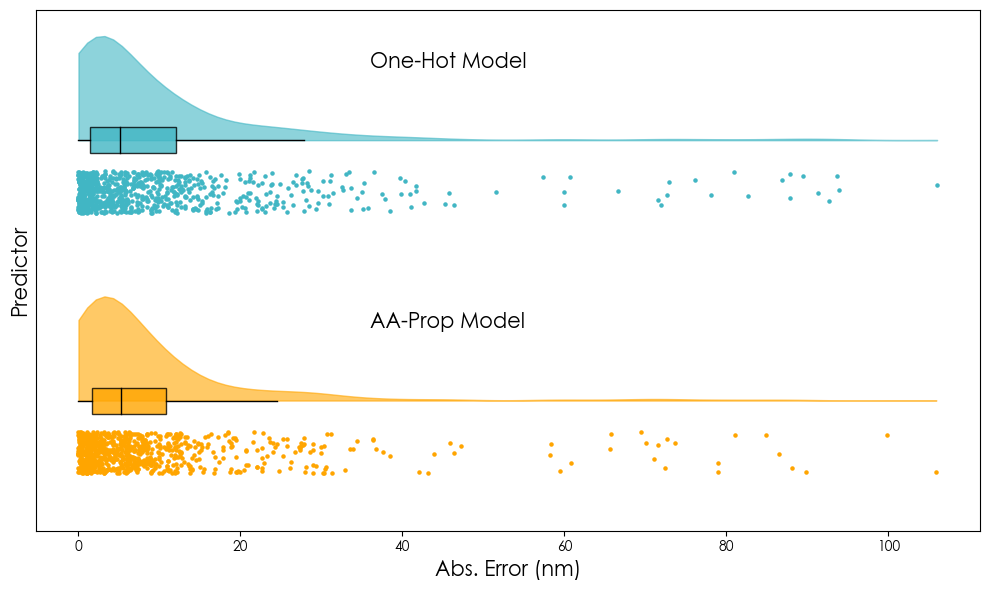

<Figure size 640x480 with 0 Axes>

In [46]:
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


fig, ax = plt.subplots(figsize=(10, 6))

#palette = sns.color_palette("Set2")
palette = ['orange', '#41b6c4']
data=[abs(aap_test['Abs_Err']), abs(oh_test['Abs_Err'])]
model_names = ["AA-Prop Model", "One-Hot Model"]


# Boxplot data
bp = ax.boxplot(data, patch_artist = True, vert = False, showcaps= False, showfliers= False, widths=0.1)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], palette):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)
for median in bp['medians']:
    median.set_color('black')


# Violinplot data
vp = ax.violinplot(dataset = data,
                     showmeans=False, showextrema=False, showmedians=False, vert = False, widths= 0.8)
for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(palette[idx])
    b.set_alpha(0.6)

# Scatterplot data
for idx, features in enumerate(data):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.08, high=.08, size=len(idxs))
    y = out
    plt.scatter(features, y, s=5, c=palette[idx])

# Annotate with model names to the right of the plot
top_max = 0
for idx, model_name in enumerate(model_names):
    max_val = max([d[idx] for d in data]) # Find the maximum value in each plot
    if max_val > top_max:
        top_max = max_val
for idx, model_name in enumerate(model_names):
    ax.text((max_val+1)*30, idx + 1.3, model_name, va='center', fontsize=15)

# Customize axis labels
plt.rcParams['font.family'] = 'Century Gothic'
plt.yticks([])
plt.ylabel('Predictor', fontsize = 15)
plt.xlabel('Abs. Error (nm)', fontsize = 15)

plt.tight_layout()
#save file
fileout = 'mut_test_err_rain_plt.png'
plt.savefig(fileout, format = 'png', dpi = 400)
fileout = 'mut_test_err_rain_plt.svg'
plt.savefig(fileout, format='svg', bbox_inches='tight')
plt.show()
plt.clf()
plt.show()

C:\Users\safra\AppData\Local\Temp\ipykernel_40132\2181522390.py:52: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_val = max([d[idx] for d in data]) # Find the maximum value in each plot


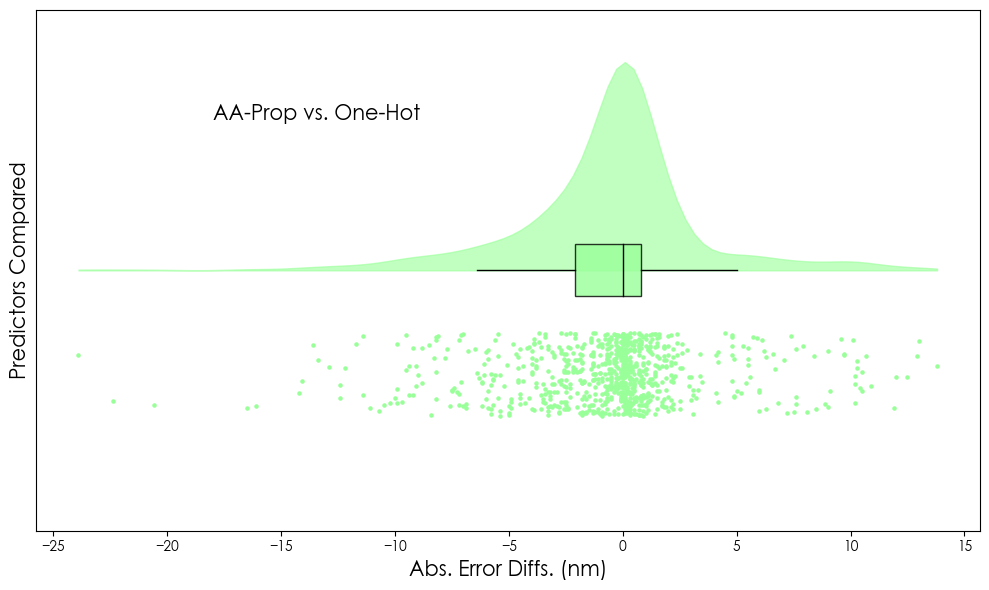

<Figure size 640x480 with 0 Axes>

In [45]:
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


fig, ax = plt.subplots(figsize=(10, 6))

#palette = sns.color_palette("Set2")
palette = ['#99FF99']
data=[aap_test['Abs_Err']-oh_test['Abs_Err']]
model_names = ["AA-Prop vs. One-Hot"]


# Boxplot data
bp = ax.boxplot(data, patch_artist = True, vert = False, showcaps= False, showfliers= False, widths=0.1)

# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], palette):
    patch.set_facecolor(color)
    patch.set_alpha(0.8)
for median in bp['medians']:
    median.set_color('black')


# Violinplot data
vp = ax.violinplot(dataset = data,
                     showmeans=False, showextrema=False, showmedians=False, vert = False, widths= 0.8)
for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(palette[idx])
    b.set_alpha(0.6)

# Scatterplot data
for idx, features in enumerate(data):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.08, high=.08, size=len(idxs))
    y = out
    plt.scatter(features, y, s=5, c=palette[idx])

# Annotate with model names to the right of the plot
top_max = 0
for idx, model_name in enumerate(model_names):
    max_val = max([d[idx] for d in data]) # Find the maximum value in each plot
    if max_val > top_max:
        top_max = max_val
for idx, model_name in enumerate(model_names):
    ax.text((-max_val+0.1)*30, idx + 1.3, model_name, va='center', fontsize = 15)

# Customize axis labels
plt.rcParams['font.family'] = 'Century Gothic'
#plt.yticks([1, 2, 3], ["WDS-epi-Predictions", "WT-Predictions", "Additive-Predictions"])
plt.yticks([])
plt.ylabel('Predictors Compared', fontsize = 15)
plt.xlabel('Abs. Error Diffs. (nm)', fontsize = 15)


plt.tight_layout()
#save file
fileout = 'mut_test_comp_err_rain_plt.png'
plt.savefig(fileout, format = 'png', dpi = 400)
fileout = 'mut_test_comp_err_rain_plt.svg'
plt.savefig(fileout, format='svg', bbox_inches='tight')
plt.show()
plt.clf()
plt.show()